In [23]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import numpy as np
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.options.display.max_rows = 5000 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf
import ffn

In [2]:
ccz = yf.Ticker('ccz.L')
ccz_2020 = ccz.history(start="2020-01-01", end= datetime.today().strftime('%Y-%m-%d'))
print(ccz_2020.shape)
print(ccz_2020.head())
print(ccz_2020.tail())

(202, 7)
             Open  High   Low  Close    Volume  Dividends  Stock Splits
Date                                                                   
2020-08-04  2.025  2.48  1.75   2.30  23726309          0             0
2020-08-05  2.300  2.60  2.20   2.45   4903456          0             0
2020-08-06  2.450  2.67  2.20   2.45   4487446          0             0
2020-08-07  2.450  2.60  2.28   2.45     73193          0             0
2020-08-10  2.500  2.65  2.37   2.50   2734365          0             0
            Open   High    Low  Close   Volume  Dividends  Stock Splits
Date                                                                   
2021-05-17  2.45  2.498  2.451   2.45  1121446          0             0
2021-05-18  2.45  2.487  2.400   2.45  1668886          0             0
2021-05-19  2.45  2.500  2.300   2.35   929648          0             0
2021-05-20  2.60  2.650  2.450   2.50  4714783          0             0
2021-05-21  2.50  2.590  2.477   2.50  1012584         

In [3]:
tickers = ['palm.l','cobr.l','kat.l','amte.l','knb.l','kav.l','irr.l','mnrg.l'
          ,'ecr.l','ccz.l','imm.l','thr.l','avo.l','cgh.l','pre.l']
print(tickers)

['palm.l', 'cobr.l', 'kat.l', 'amte.l', 'knb.l', 'kav.l', 'irr.l', 'mnrg.l', 'ecr.l', 'ccz.l', 'imm.l', 'thr.l', 'avo.l', 'cgh.l', 'pre.l']


In [5]:
df = pd.DataFrame()
for i in tickers:
    x = yf.Ticker(i)
    new_name = str(x) +'_2020'
    df[new_name] = x.history(start="2020-01-01", end= datetime.today().strftime('%Y-%m-%d')).Close


In [6]:
df.columns = [i.replace('yfinance.Ticker object <','') for i in df.columns]
df.columns = [i.replace('.L>_2020','') for i in df.columns]

In [15]:
df.head()

,PALM,COBR,KAT,AMTE,KNB,KAV,IRR,MNRG,ECR,CCZ,IMM,THR,AVO,CGH,PRE
Date,,,,,,,,,,,,,,,
2020-01-09,6.50,1.25,0.925,NaN,0.0465,1.8,10.500,0.535,0.700,NaN,16.50,0.450,39.00,36.299999,NaN
2020-01-10,6.15,1.25,0.925,NaN,0.0465,1.7,10.500,0.530,0.700,NaN,16.15,0.440,38.50,36.799999,NaN
2020-01-13,4.35,1.25,0.925,NaN,0.0465,1.7,10.625,0.525,0.725,NaN,15.65,0.430,38.50,37.900002,NaN
2020-01-14,4.35,1.25,0.925,NaN,0.0465,1.7,10.625,0.510,0.725,NaN,14.31,0.445,38.00,37.500000,NaN
2020-01-15,4.35,1.25,0.925,NaN,0.0465,1.7,11.750,0.525,0.725,NaN,14.22,0.435,37.75,35.799999,NaN


#### for some reason, data in 4.13 is divided by 100, need to get them back up.

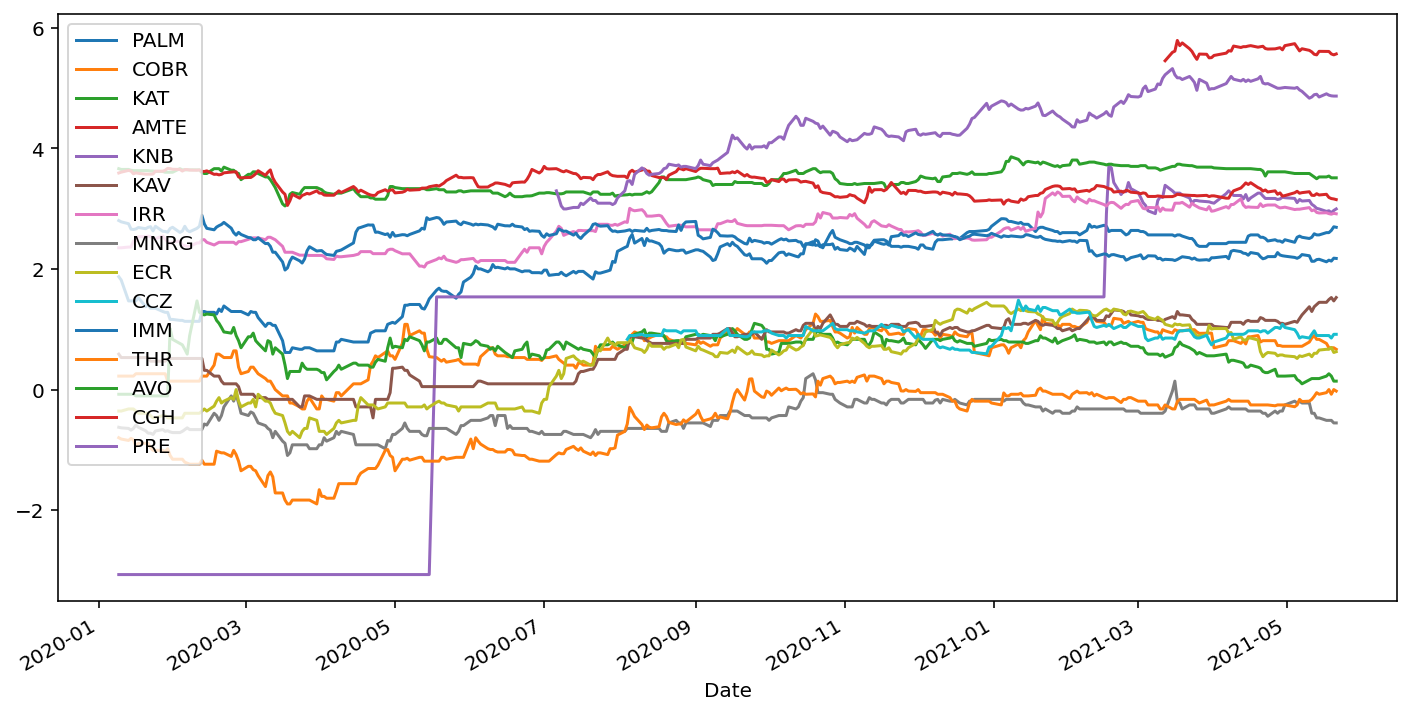

In [21]:
np.log(df).plot(figsize=(12,6));

In [28]:
# 'palm.l,cobr.l,kat.l,amte.l,knb.l,kav.l,irr.l,mnrg.l,ecr.l,ccz.l,imm.l,thr.l,avo.l,cgh.l,pre.l'
returns = ffn.get('palm.l,cobr.l,kat.l,amte.l,knb.l,kav.l,irr.l,mnrg.l,ecr.l,ccz.l,imm.l,\
                  thr.l,avo.l,cgh.l,pre.l', start='2020-01-01').to_returns().dropna()
returns.calc_mean_var_weights().as_format('.2%')

palml    14.87%
cobrl     0.00%
katl      0.00%
amtel    11.72%
knbl      0.00%
kavl     36.77%
irrl      0.00%
mnrgl     1.80%
ecrl      0.00%
cczl      7.59%
imml      2.60%
thrl     24.66%
avol      0.00%
cghl      0.00%
prel      0.00%
dtype: object

In [54]:
rtns.head()

,palml,cobrl,katl,amtel,knbl,kavl,irrl,mnrgl,ecrl,cczl,imml,thrl,avol,cghl,prel
Date,,,,,,,,,,,,,,,
2021-03-15,0.00,-3.77%,5.26%,14.99%,-8.78%,4.69%,-0.51%,39.29%,-3.39%,0.00%,-0.69%,-6.45%,3.85%,0.20%,10.81%
2021-03-16,-1.92,5.88%,11.11%,2.05%,-3.70%,-2.99%,12.24%,17.95%,4.39%,-2.13%,-1.28%,0.00%,0.00%,1.43%,-9.76%
2021-03-17,1.96,-1.85%,2.50%,19.34%,0.00%,12.31%,0.00%,-28.26%,-1.51%,10.87%,1.76%,13.10%,3.70%,2.41%,-4.86%
2021-03-18,0.00,0.00%,7.32%,-8.26%,0.00%,-5.48%,0.00%,-3.03%,0.68%,3.92%,2.31%,3.66%,0.00%,-0.59%,0.00%
2021-03-19,-1.92,0.00%,-4.55%,4.67%,-3.08%,0.00%,1.36%,-9.37%,-1.69%,0.00%,2.26%,0.00%,-1.19%,-0.39%,-2.84%


#### 上表中, 所有的entries都是string。如果要plot, 需要去掉‘%’，然后.astype('float')

In [58]:
# remove '%'
for i in rtns.columns:
    rtns[i] = [x.replace('%','') for x in rtns[i]]
    

# change column types
for i in rtns.columns:
    rtns[i] = rtns[i].astype('float')

rtns.dtypes

In [63]:
rtns.head()

,palml,cobrl,katl,amtel,knbl,kavl,irrl,mnrgl,ecrl,cczl,imml,thrl,avol,cghl,prel
Date,,,,,,,,,,,,,,,
2021-03-15,0.00,-3.77,5.26,14.99,-8.78,4.69,-0.51,39.29,-3.39,0.00,-0.69,-6.45,3.85,0.20,10.81
2021-03-16,-1.92,5.88,11.11,2.05,-3.70,-2.99,12.24,17.95,4.39,-2.13,-1.28,0.00,0.00,1.43,-9.76
2021-03-17,1.96,-1.85,2.50,19.34,0.00,12.31,0.00,-28.26,-1.51,10.87,1.76,13.10,3.70,2.41,-4.86
2021-03-18,0.00,0.00,7.32,-8.26,0.00,-5.48,0.00,-3.03,0.68,3.92,2.31,3.66,0.00,-0.59,0.00
2021-03-19,-1.92,0.00,-4.55,4.67,-3.08,0.00,1.36,-9.37,-1.69,0.00,2.26,0.00,-1.19,-0.39,-2.84


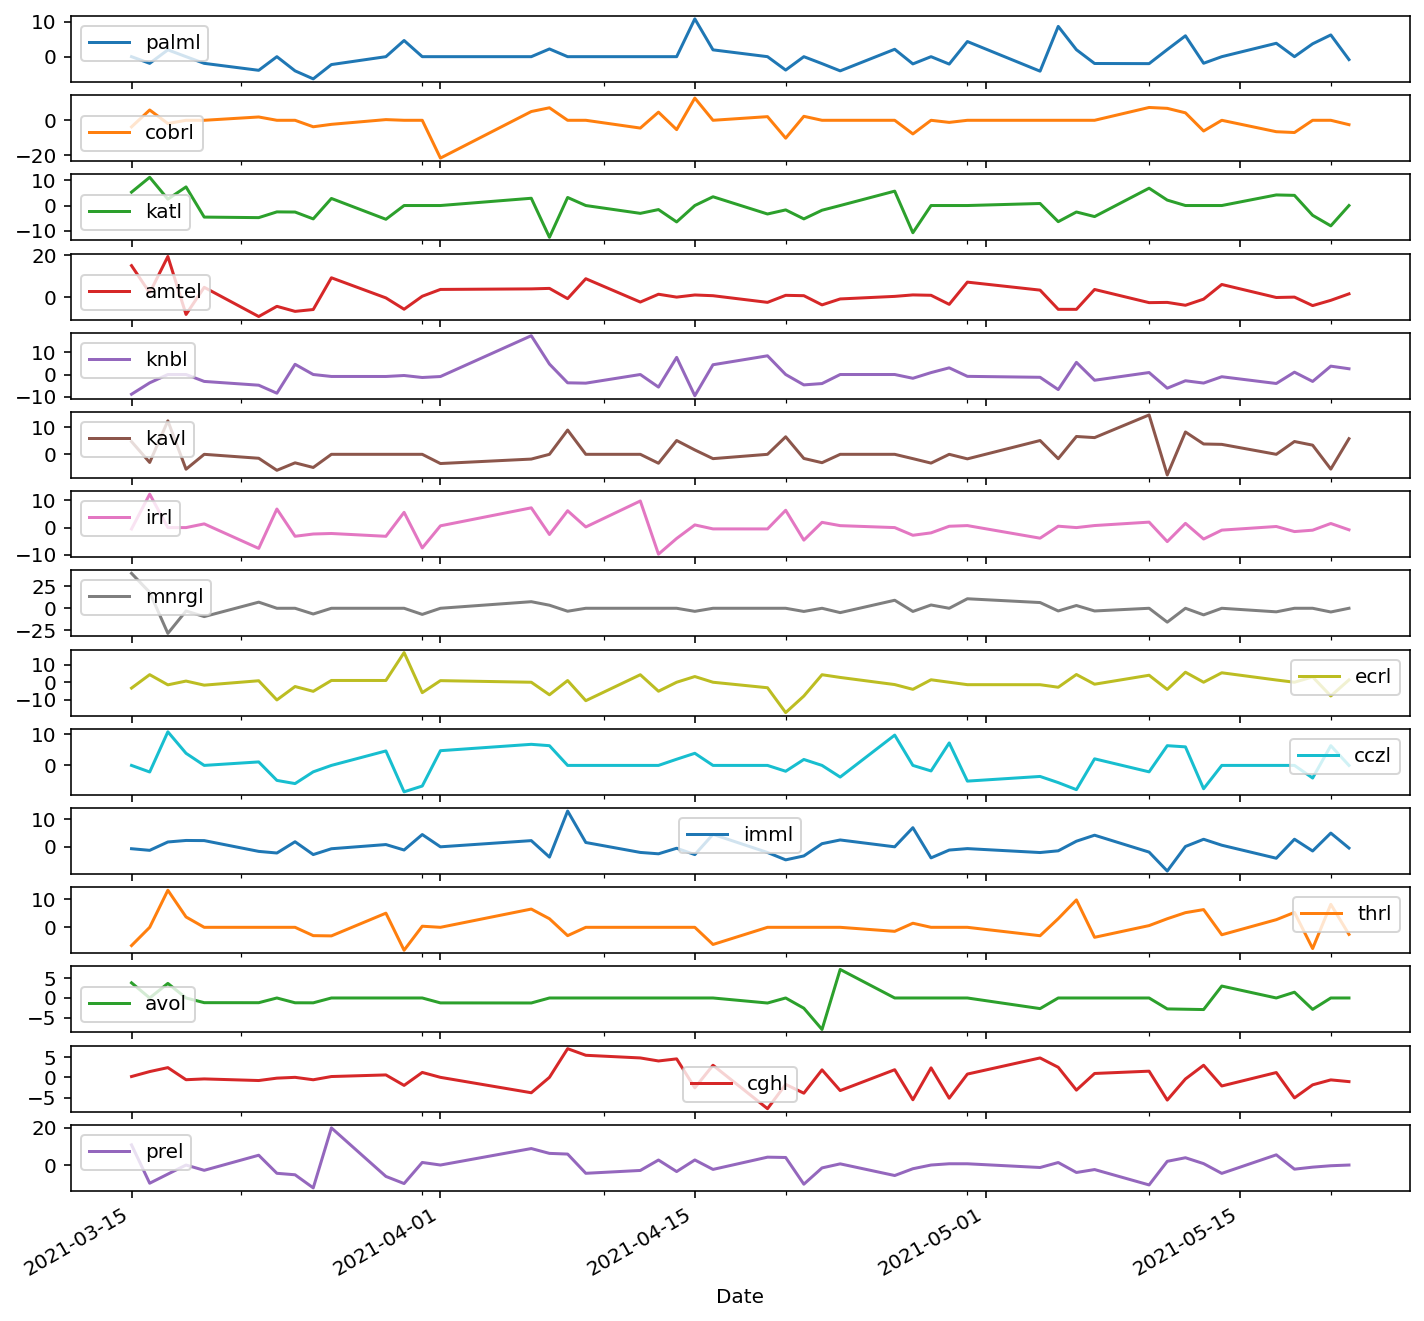

In [71]:
rtns.plot(figsize=(12,12),subplots=True);

In [86]:
ccz.info

{'zip': '6005',
 'sector': 'Basic Materials',
 'longBusinessSummary': 'Castillo Copper Limited engages in the exploration and examination of mineral properties in Australia and Africa. The company primarily explores for copper, cobalt, nickel, and zinc deposits. It owns interests in the Cangai copper mine located in northern New South Wales; Mt Oxide project in the Mt Isa district, north-west Queensland; and various assets in Zambia. Castillo Copper Limited was incorporated in 2009 and is based in West Perth, Australia.',
 'city': 'West Perth',
 'phone': '61 8 9389 4407',
 'state': 'WA',
 'country': 'Australia',
 'companyOfficers': [],
 'website': 'http://www.castillocopper.com',
 'maxAge': 1,
 'address1': '45 Ventnor Avenue',
 'fax': '61 8 6316 3337',
 'industry': 'Other Industrial Metals & Mining',
 'previousClose': 2.5,
 'regularMarketOpen': 2.415,
 'twoHundredDayAverage': 2.6844365999999997,
 'trailingAnnualDividendYield': None,
 'payoutRatio': 0,
 'volume24Hr': None,
 'regularMark

In [73]:
dict_ccz = ccz.info

In [89]:
pdf = pd.DataFrame.from_dict(ccz.info, orient='index')

In [82]:
df = pd.DataFrame(pdf, columns=['city','state'])

In [90]:
pdf

,0
zip,6005
sector,Basic Materials
longBusinessSummary,Castillo Copper Limited engages in the explora...
city,West Perth
phone,61 8 9389 4407
state,WA
country,Australia
companyOfficers,[]
website,http://www.castillocopper.com
maxAge,1


In [85]:
type(dict_ccz)

dict